# Predicting Heart Disease using Machine Learning 

This project uses varios python based Machine Learning and Data Science libraries to build a machine learning model capable of predicting weather someone has heart disease or not based on their medical reports.

### Approach to the problem 

1. Problem Definition
2. Data Gathering
3. Data Evaluation
4. Features
5. Modelling
6. Experimentation

#### Problem Defination 

> Given clinical parameters about a patient, can we predict if a patient has heart disease or not.

#### Data source UCI kaggle
https://archive.ics.uci.edu/dataset/45/heart+disease

#### Evaluation 
> Target for the project is 95% accuracy. If we can reach an accuracy of 95% the project will be considered successful.dicted attribute14. #58 (num)  14. #58 (num)
 

### Feeatures

1. age (Age of the patient in years)
2. sex (Male/Female)
3. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
4. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. chol (serum cholesterol in mg/dl)
6. fbs (if fasting blood sugar > 120 mg/dl)
7. restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
8. thalach: maximum heart rate achieved
9. exang: exercise-induced angina (True/ False)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: [normal; fixed defect; reversible defect]
14. target: the predicted attribute

## Preparing the tools 

We are going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [69]:
# import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
#we want our plots to appear inside the notebook 

# models from Scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Data Analysis Section 

### Load Data 

In [2]:
df = pd.read_csv("160 - heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find  more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve? 
2. What kind of data do we have and how do we treat different types? 
3. What's missing from the data and how do you deal with it? 
4. Where are the outliers and why should you care about them? 
5. How can you add, change or remove features to get nore out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


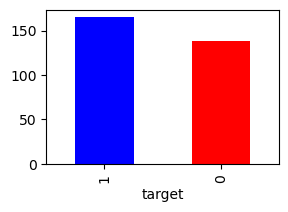

In [4]:
df.target.value_counts().plot(kind="bar", color=["blue", "red"], figsize=(3,2));

In [5]:
# what kind of data do we have 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# are there any missing values ? 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### lets evaluate some features 
#### Dependency of heart Disease on patient's gender 

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


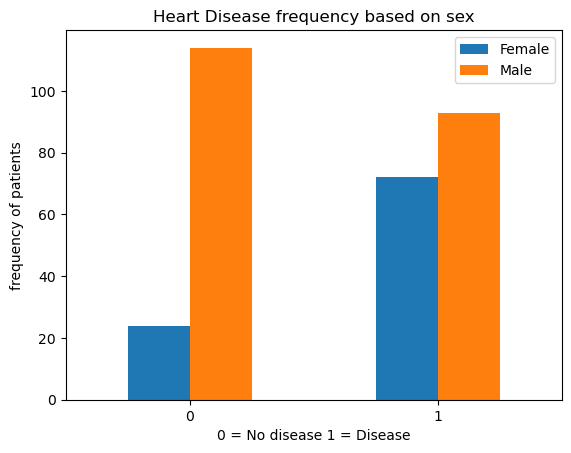

In [10]:
pd.crosstab(df.target, df.sex).plot(kind="bar")
plt.title("Heart Disease frequency based on sex")
plt.xlabel("0 = No disease 1 = Disease")
plt.ylabel("frequency of patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### lets explore thalach with refrence to the target
thalach: maximum heart rate achieved

In [11]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

Text(0.5, 1.0, 'Age distribution in Data')

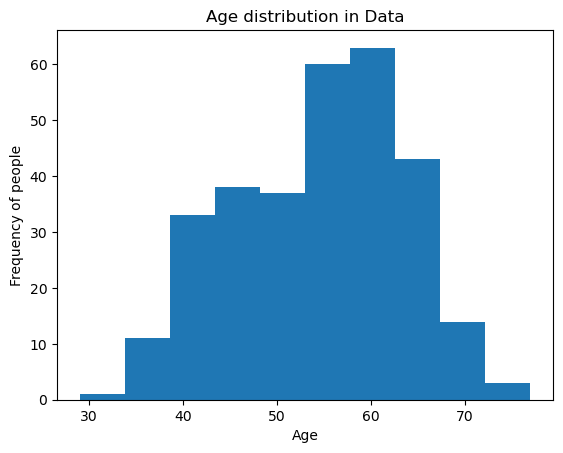

In [12]:
plt.hist(df.age)
plt.xlabel("Age")
plt.ylabel("Frequency of people")
plt.title("Age distribution in Data")

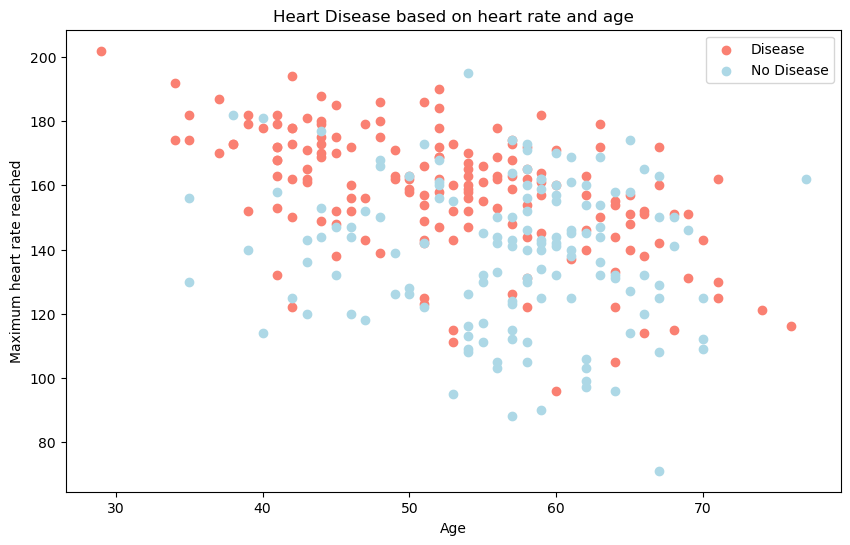

In [13]:
# as there are lot of different values in 
# thalach scatter plot should be good for plotting it.

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],color="lightblue")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate reached")
plt.title("Heart Disease based on heart rate and age")
plt.legend(["Disease", "No Disease"]);

#### Exploring chest pain (cp) with reference to target 

In [14]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

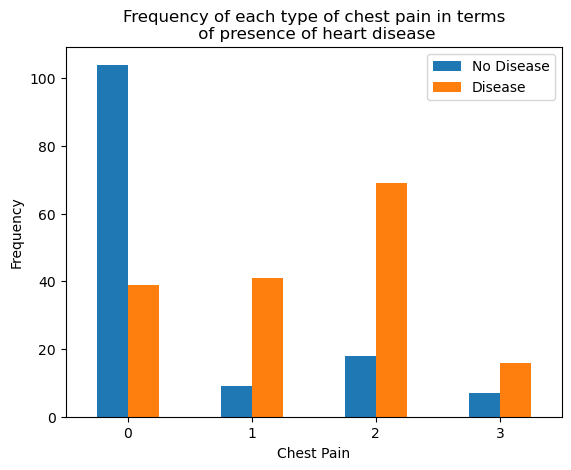

In [15]:
## as there are only 4 different values present we can plot this using bar graph

pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.xlabel("Chest Pain")
plt.ylabel("Frequency")
plt.title("Frequency of each type of chest pain in terms\n of presence of heart disease")
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])

### Correlation matrix

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


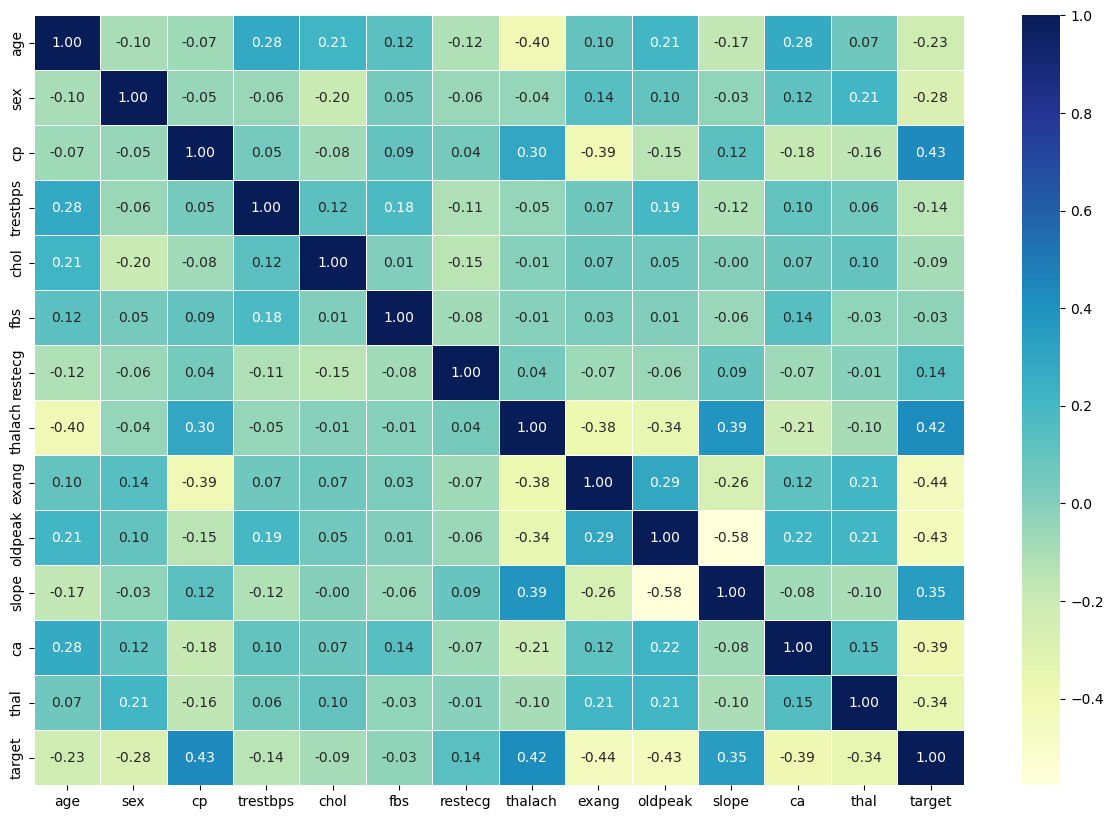

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                linewidths=0.5, 
                fmt=".2f",
                 cmap="YlGnBu");

## 5. modelling

In [18]:
# Split data into X and y 
X = df.drop(columns="target")
y = df.target

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
# Split data into train and test split 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

### now we have all the data ready
lets train a model on the training dataset. 

#### We are going to try 3 different models: 
1. Logistic Regression
2. K-nearest neighbours
3. Random Forest Classifier

In [21]:
# create a model dictionary 
model_dict = { "Logistic Regression": LogisticRegression(), 
             "KNN" : KNeighborsClassifier(), 
             "Random Forest" : RandomForestClassifier()}

In [22]:
# create a function to train the model and retrun score  

def model_trainer(model_dict, X_train, X_test, y_train, y_test): 
    """
    train each of the model present in the model_dict on training data
    retrurns the score of the model on test dataset.
    model_dict : dictionary of models 
    X_train : training features data
    X_test : testing features data 
    y_train : training dataset labels 
    y_test : testing dataset labels
    """
    np.random.seed(42)
    model_score = {}
    for name, model in model_dict.items():
        clf = model.fit(X_train, y_train) 
        score = model.score(X_test, y_test)  
        # save score in score dictionary 
        model_score[name] = score 

    return model_score

In [23]:
model_scores = model_trainer(model_dict=model_dict, 
                            X_train=X_train, 
                            X_test= X_test, 
                            y_train=y_train, 
                            y_test = y_test) 
model_scores

C:\Users\dell\Desktop\AI_course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision 

In [24]:
model_compare = pd.Series(model_scores)
model_compare = round(model_compare*100,2)
model_compare

Logistic Regression    88.52
KNN                    68.85
Random Forest          83.61
dtype: float64

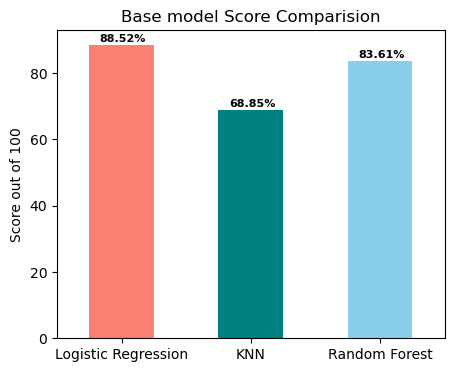

In [25]:
model_compare.plot(kind="bar", figsize=(5,4), color = ["salmon", "teal", "skyblue"])
plt.xticks(rotation=0)
plt.title("Base model Score Comparision")
plt.ylabel("Score out of 100")
for i in range(3):
    plt.text(i-0.17, model_compare.iloc[i]+1, str(model_compare.iloc[i])+"%",fontsize=8, fontweight="bold")

## Now we have a baseline model 
Let's look at the following:
* Hyperparameter tuning 
* Feature importance
* Confusion Matrix
* Corss Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning 

In [26]:
# Let's tune KNN 

train_scores = []
test_scores = []

# list of different values for n_neighbors  
neighbors = range(1,20)

knn = KNeighborsClassifier()

# Loop through different n_neighbours  
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the model  
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
np.array(train_scores).mean()

0.7327098738581993

In [28]:
np.array(test_scores).mean()

0.6971527178602244

Maximum KNN score on test data: 75.41


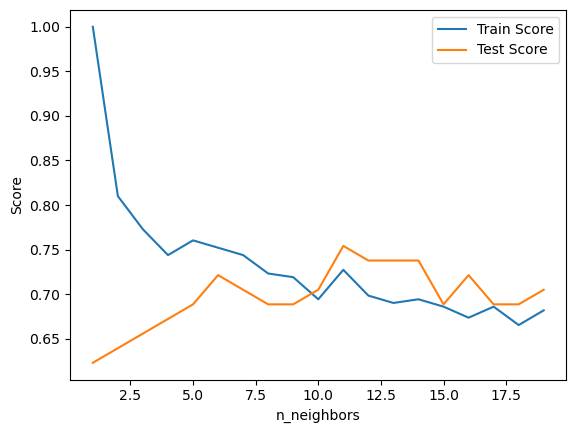

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.legend(["Train Score", "Test Score"]);

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}")

Based on this scores we can say that even parameter tuning is not working good for this classification model. So lets go for another modelm

## Tuning hypeparameters using RandomsizedSearchCV 
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [39]:
# Create hyperparameter grid for logistic regression

log_grid = { "C": np.logspace(-4, 4, 20), 
          "solver" : ["liblinear"]
}

# Create hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators" : np.arange(10, 1000, 50), 
           "max_depth" : [None, 3,5,1000], 
           "min_samples_split" : np.arange(2, 20,2), 
           "min_samples_leaf" : np.arange(1, 20, 2)
          }

### Let's tune this models using RandomiszedSearchCV  

In [37]:
# Tune logisticRegression 

np.random.seed(42)

# setup random hyperparameters search fo LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= log_grid, 
                               cv=5, 
                               n_iter=20,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [41]:
# Tuning RandomForestClassifier() 
np.random.seed(42)

rs_rf = RandomizedSearchCV( RandomForestClassifier(), 
                          param_distributions= rf_grid, 
                          cv = 5, 
                          n_iter=20, 
                          verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning using GridSearchCV

Since LogisticRegression is working best. We will try and improve it  again using GridSearchCV

In [65]:
log_grid = {
    "C" : np.logspace(-4,4,30),
    "solver" : ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid=log_grid, 
                         cv =5, 
                         verbose=True) 

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning model, beyond accuracy
* ROC  curve and AUC curve
* Confusion matrix
* Classification report
* Precison
* Recall
* F1-score

using cross validation wherever possible.

In [76]:
# Prediction on test data on trained and tuned model 
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

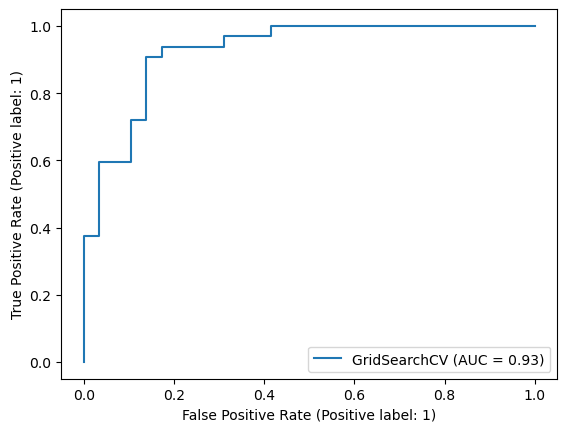

In [87]:
# plot ROC curve and calculate AUC matric 
# fpr, tpr, threshold = roc_curve(y_test, y_preds, drop_intermediate=False)
# roc_auc = auc(fpr, tpr)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

#### lets see confusion matrix

In [89]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

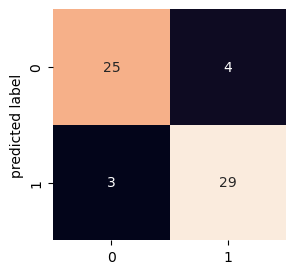

In [106]:
# plotting confusion matrix  
def plot_heat_map(y_test, y_preds): 
    """ 
    plotting ROC curve using matplotlib's seaborn heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True, 
                    cbar=False)
    plt.ylabel("predicted label")

plot_heat_map(y_test, y_preds)

#### Let's get a classification report

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculate evaluation matrix using cross validation

We are going to calculate precision, recall and F1-score of our model using corss-validation score and to do so we'll be using corss_val_score()

In [108]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [141]:
clf = LogisticRegression(C=0.20433597178569418, 
                        solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [142]:
# Cross-validated accuracy
cv_accy = cross_val_score(clf, X, y, 
                            cv=5, 
                         scoring="accuracy")
cv_accy.mean()

0.8446994535519124

In [143]:
cv_precsion = cross_val_score(clf, X, y, 
                            cv=5, 
                         scoring="precision")
cv_precsion.mean()

0.8207936507936507

In [144]:
cv_recall = cross_val_score(clf, X, y, 
                            cv=5, 
                         scoring="recall")
cv_recall.mean()

0.9212121212121213

In [145]:
cv_f1 = cross_val_score(clf, X, y, 
                            cv=5, 
                         scoring="f1")
cv_f1.mean()

0.8673007976269721

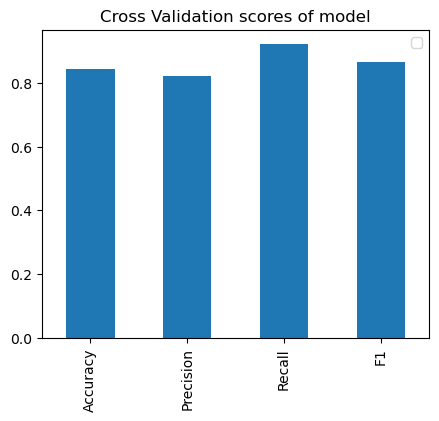

In [146]:
# Visualize corss-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy": cv_accy.mean(), 
                         "Precision" : cv_precsion.mean(), 
                         "Recall" : cv_recall.mean(), 
                         "F1" : cv_f1.mean()}, index=[0])
cv_metrics.T.plot(kind= "bar", figsize = (5,4))
plt.legend("")
plt.title("Cross Validation scores of model");

### Feature Importance 
> Feature importance is a way of asking which features contributed the most to the outcomes of the model and how did they contribute?

> finding feature importance is different for each machine learning model. One way to find feature importance is to search "(MODEL NAME) feature importance"

Lets find the feature importance for our LogisticRegression model

In [147]:
# check coef_ 
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [150]:
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: >

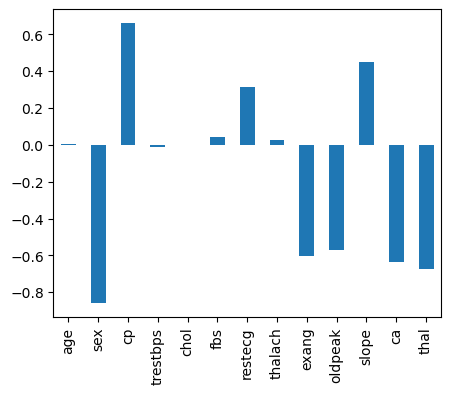

In [160]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot(kind="bar", legend = False, figsize = (5,4))